# LAB3 - КРИПТОГРАФИЈА

## 151027 Fisnik Limani

# 1. DES (DATA ENCRYPTION STANDARD) IMPLEMENTATION

In [461]:
# Convert ASCII text to binary
def _ascii_to_bin(text):

    out = ""
    for letter in text:
        out += bin(ord(letter))[2:].zfill(8)
    # ord(letter) - Given a string of length one, return an integer representing the Unicode code point of the character 
    #               when the argument is a unicode object, or the value of the byte when the argument is an 8-bit string. 

    # Pad block with 0s if necessary
    for i in range(64-(len(out))):
        out += "0"

    return out

In [463]:
# Convert binary to ASCII text
def _bin_to_ascii(bit64):

    out = ""
    for i in range(0, 64, 8):
        out += chr(int(bit64[i:i+8], 2))

    #out.replace("\x00", "")
    return out

In [462]:
# Convert HEX text to binary
def _hex_to_bin(text):

    out = ""
    for letter in text:
        out += bin(int(letter, 16))[2:].zfill(4)

    # Pad block with 0s if necessary
    for i in range(64-(len(out))):
        out += "0"

    return out

In [495]:
# Convert binary to hex
def _bin_to_hex(bit64):

    out = ""
    for i in range(0, len(bit64), 4):
        out += hex(int(bit64[i:i+4], 2))[2:]

    return out

In [456]:
"""
Expansion:

    - Takes 32-bit binary number in the form of a string
    - Transforms and permutes 32-bit number into 48-bit number
    - Returns 48-bit binary number in the form of a string

"""
def _expansion(bit32):

    # Expansion table
    e = [32,  1,  2,  3,  4,  5,
          4,  5,  6,  7,  8,  9,
          8,  9, 10, 11, 12, 13,
         12, 13, 14, 15, 16, 17,
         16, 17, 18, 19, 20, 21,
         20, 21, 22, 23, 24, 25,
         24, 25, 26, 27, 28, 29,
         28, 29, 30, 31, 32,  1]

    # Perform permutation on bit32
    out = ""
    for number in e:
        out += bit32[number-1]

    return out

In [457]:
"""
Sbox Substitution:

    - Takes 48-bit binary number in the form of a string
    
    - Splits 48-bit input into 8 chunks of 6 bits
    - Performs substitutions on each chunk using 8 hard-coded tables:
	    > The first and last bit of the 6-bit chunk acts as a
	      coordinate for the row of the Sbox
	    > The middle 4 bits act as a coordinate for the column
	    
    - Returns 32-bit binary number in the form of a string 
"""
def _Sbox(bit48, s_boxovi = False, round_s_boxovi = False, round_s_boxovi_list = None):

    s = [
         # s1
         [[14,  4, 13,  1,  2, 15, 11,  8,  3, 10,  6, 12,  5,  9,  0,  7],
          [ 0, 15,  7,  4, 14,  2, 13,  1, 10,  6, 12, 11,  9,  5,  3,  8],
          [ 4,  1, 14,  8, 13,  6,  2, 11, 15, 12,  9,  7,  3, 10,  5,  0],
          [15, 12,  8,  2,  4,  9,  1,  7,  5, 11,  3, 14, 10,  0,  6, 13]],
         # s2
         [[15,  1,  8, 14,  6, 11,  3,  4,  9,  7,  2, 13, 12,  0,  5, 10],
          [ 3, 13,  4,  7, 15,  2,  8, 14, 12,  0,  1, 10,  6,  9, 11,  5],
          [ 0, 14,  7, 11, 10,  4, 13,  1,  5,  8, 12,  6,  9,  3,  2, 15],
          [13,  8, 10,  1,  3, 15,  4,  2, 11,  6,  7, 12,  0,  5, 14,  9]],
         # s3
         [[10,  0,  9, 14,  6,  3, 15,  5,  1, 13, 12,  7, 11,  4,  2,  8],
          [13,  7,  0,  9,  3,  4,  6, 10,  2,  8,  5, 14, 12, 11, 15,  1],
          [13,  6,  4,  9,  8, 15,  3,  0, 11,  1,  2, 12,  5, 10, 14,  7],
          [ 1, 10, 13,  0,  6,  9,  8,  7,  4, 15, 14,  3, 11,  5,  2, 12]],
         # s4
         [[ 7, 13, 14,  3,  0,  6,  9, 10,  1,  2,  8,  5, 11, 12,  4, 15],
          [13,  8, 11,  5,  6, 15,  0,  3,  4,  7,  2, 12,  1, 10, 14,  9],
          [10,  6,  9,  0, 12, 11,  7, 13, 15,  1,  3, 14,  5,  2,  8,  4],
          [ 3, 15,  0,  6, 10,  1, 13,  8,  9,  4,  5, 11, 12,  7,  2, 14]],
         # s5
         [[ 2, 12,  4,  1,  7, 10, 11,  6,  8,  5,  3, 15, 13,  0, 14,  9],
          [14, 11,  2, 12,  4,  7, 13,  1,  5,  0, 15, 10,  3,  9,  8,  6],
          [ 4,  2,  1, 11, 10, 13,  7,  8, 15,  9, 12,  5,  6,  3,  0, 14],
          [11,  8, 12,  7,  1, 14,  2, 13,  6, 15,  0,  9, 10,  4,  5,  3]],
         # s6
         [[12,  1, 10, 15,  9,  2,  6,  8,  0, 13,  3,  4, 14,  7,  5, 11],
          [10, 15,  4,  2,  7, 12,  9,  5,  6,  1, 13, 14,  0, 11,  3,  8],
          [ 9, 14, 15,  5,  2,  8, 12,  3,  7,  0,  4, 10,  1, 13, 11,  6],
          [ 4,  3,  2, 12,  9,  5, 15, 10, 11, 14,  1,  7,  6,  0,  8, 13]],
         # s7
         [[ 4, 11,  2, 14, 15,  0,  8, 13,  3, 12,  9,  7,  5, 10,  6,  1],
          [13,  0, 11,  7,  4,  9,  1, 10, 14,  3,  5, 12,  2, 15,  8,  6],
          [ 1,  4, 11, 13, 12,  3,  7, 14, 10, 15,  6,  8,  0,  5,  9,  2],
          [ 6, 11, 13,  8,  1,  4, 10,  7,  9,  5,  0, 15, 14,  2,  3, 12]],
         # s8
         [[13,  2,  8,  4,  6, 15, 11,  1, 10,  9,  3, 14,  5,  0, 12,  7],
          [ 1, 15, 13,  8, 10,  3,  7,  4, 12,  5,  6, 11,  0, 14,  9,  2],
          [ 7, 11,  4,  1,  9, 12, 14,  2,  0,  6, 10, 13, 15,  3,  5,  8],
          [ 2,  1, 14,  7,  4, 10,  8, 13, 15, 12,  9,  0,  3,  5,  6, 11]]
        ]
    
    # Break up 48-bit input into 8 6-bit chunks
    bit6_list = []
    for i in range(0, 48, 6):
        bit6_list.append(bit48[i:i+6])
    if s_boxovi:
        print(bit6_list)
    elif round_s_boxovi:
        # print(bit6_list)
        round_s_boxovi_list.append(bit6_list)

    # Perform 8 Sbox substitutions using the 8 6-bit chunks
    # and the 8 Sbox tables s1-s8
    out = ""
    for i in range(8):
        chunk = bit6_list[i]
        row = int(chunk[0]+chunk[5], 2)
        col = int(chunk[1:5], 2)

        out += (bin(s[i][row][col])[2:].zfill(4))

    return out

In [458]:
"""
Permute:

    - Takes 32-bit binary number in the form of a string
    - Performs simple permutation on the number
    - Returns 32-bit binary number in the form of a string

"""
def _permute(bit32):

    # Permutation table
    p = [16,  7, 20, 21,
         29, 12, 28, 17,
          1, 15, 23, 26,
          5, 18, 31, 10,
          2,  8, 24, 14,
         32, 27,  3,  9,
         19, 13, 30,  6,
         22, 11,  4, 25]

    # Perform permutation on bit32
    out = ""
    for number in p:
        out += bit32[number-1]

    return out

In [459]:
"""
f Function:

    - Takes 32-bit binary number in the form of a string (bit32)
      and a 48-bit binary number in the form of a string (key)

    - Performs various permutations, expansions, and reductions
      on the input bit32

    - Returns 32-bit binary number in the form of a string


"""
def f(bit32, key, s_boxovi = False, round_s_boxovi = False, round_s_boxovi_list = None):

    # Expand 32-bit input to 48 bits and convert to int
    bit48 = int(_expansion(bit32), base = 2)


    # XOR 48-bit result and round key, and then convert back to binary
    bit48 ^= int(key, 2)
    bit48 = bin(bit48)[2:].zfill(48)
    # [2:] - because bin gives a number of a form '0b{binaryNumberRepresentation}'
    # zfill(width) - The width specifies the length of the returned string from zfill() with '0' digits filled to the left.
    

    # Perform Sbox substitution
    bit32 = _Sbox(bit48, s_boxovi, round_s_boxovi, round_s_boxovi_list)


    # Perform permutation on bit32
    bit32 = _permute(bit32)
    

    return bit32

In [532]:
def _cipher(bit64, keys, first_round = False, s_boxovi = False, round_s_boxovi = False, round_s_boxovi_list = None):

    # Initial permutation table
    ip = [58, 50, 42, 34, 26, 18, 10, 2,
          60, 52, 44, 36, 28, 20, 12, 4,
          62, 54, 46, 38, 30, 22, 14, 6,
          64, 56, 48, 40, 32, 24, 16, 8,
          57, 49, 41, 33, 25, 17,  9, 1,
          59, 51, 43, 35, 27, 19, 11, 3,
          61, 53, 45, 37, 29, 21, 13, 5,
          63, 55, 47, 39, 31, 23, 15, 7]

    # Final permutation
    fp = [40,  8, 48, 16, 56, 24, 64, 32,
          39,  7, 47, 15, 55, 23, 63, 31,
          38,  6, 46, 14, 54, 22, 62, 30,
          37,  5, 45, 13, 53, 21, 61, 29,
          36,  4, 44, 12, 52, 20, 60, 28,
          35,  3, 43, 11, 51, 19, 59, 27,
          34,  2, 42, 10, 50, 18, 58, 26,
          33,  1, 41,  9, 49, 17, 57, 25]
    

    # Perform initial permutation on block
    p = ""
    for number in ip:
        p += bit64[number-1]

    # Split block into two halves
    ln = p[:32]
    rn = p[32:]
    
    # print('After initial permutation', _bin_to_hex(p))
    # print('L0', _bin_to_hex(ln), 'R0', _bin_to_hex(rn))
        
    # 16 rounds of encryption, rotating and XORing each half after each round
    for i in range(16):
        temp = rn
        if round_s_boxovi:
            rn = bin(int(ln, 2) ^ int(f(rn, keys[i], round_s_boxovi = round_s_boxovi, round_s_boxovi_list = round_s_boxovi_list), 2))[2:].zfill(32)
        elif i == 1 and s_boxovi:
            rn = bin(int(ln, 2) ^ int(f(rn, keys[i], True), 2))[2:].zfill(32)
            break
        elif i == 0 and first_round:
            print(ln + rn)
            break
        else:
            rn = bin(int(ln, 2) ^ int(f(rn, keys[i]), 2))[2:].zfill(32)
        ln = temp
        # print(_bin_to_hex(ln), _bin_to_hex(rn), _bin_to_hex(keys[i]))
    
    # We reverse the order of the two blocks into R16L16 and perform final permutation
    combined = rn + ln
    # combined = ln + rn
    out = ""
    for number in fp:
        out += combined[number-1]
    
    return out

In [465]:
def encrypt(text, keys, first_round=False, s_boxovi = False, round_s_boxovi = False, round_s_boxovi_list = None):

    # Split text up into 64-bit chunks
    blocks = []
    for i in range(0, len(text), 16):
        blocks.append(text[i:i+16])


    # Encrypt chunks
    e_list = []
    for block in blocks:
        e_list.append(_cipher(_hex_to_bin(block), keys, first_round, s_boxovi, round_s_boxovi, round_s_boxovi_list))


    # Combine chunks back into a single string
    out = ""
    for block in e_list:
        #out += _bin_to_ascii(block)    # ASCII output
        out += hex(int(block, 2))      # Hex output
        #out += block                    # Binary output
    return out

In [466]:
import random

"""
DES Key Scheduler:

    - Generates 16 48-bit subkeys from a randomly
      generated 64-bit initial key

    - Returns a list of the 16 subkeys in the form
      of binary strings

"""

def key_scheduler(key = None, is_key_random = False):

    # -------------------- Variables -------------------- #
    #
    # k         Initial 64-bit key
    # k_prime   Permuted 56-bit key
    # c0        Left half of k_prime
    # d0        Right half of k_prime
    # c_keys    16 28-bit permutations of c0 using lrt
    # d_keys    16 28-bit permutations of d0 using lrt
    # keys      Final list of 16 48-bit keys
    #
    # --------------------------------------------------- #

    
    # ---------------- Hard-Coded Values ---------------- #

    # pc1       Permutation table No. 1
    pc1 = [57, 49, 41, 33, 25, 17,  9, #7
            1, 58, 50, 42, 34, 26, 18, #14
           10,  2, 59, 51, 43, 35, 27, #21
           19, 11,  3, 60, 52, 44, 36, #28
           63, 55, 47, 39, 31, 23, 15, #35
            7, 62, 54, 46, 38, 30, 22, #42
           14,  6, 61, 53, 45, 37, 29, #49
           21, 13,  5, 28, 20, 12,  4] #56

    # pc2       Permutation table No. 2
    pc2 = [14, 17, 11, 24,  1,  5,
           3,  28, 15,  6, 21, 10,
           23, 19, 12,  4, 26,  8,
           16,  7, 27, 20, 13,  2,
           41, 52, 31, 37, 47, 55,
           30, 40, 51, 45, 33, 48,
           44, 49, 39, 56, 34, 53,
           46, 42, 50, 36, 29, 32]
           

    # lrt       Left rotation table
    lrt = [1, 1, 2, 2, 2, 2, 2, 2,
           1, 2, 2, 2, 2, 2, 2, 1]

    # --------------------------------------------------- #


    

    # Generate random 64-bit number
    # Note - Even though the algorithm starts with a 64-bit key, DES is still technically
    # 56-bit, because 8 of the bits are used as parity bits. These bits are lost during the
    # first permutation using pc1.
    k = None
    if is_key_random:
        k = random.getrandbits(64)    # getrandbits(k) - Returns a python long int with k random bits. 
        k = bin(k)[2:].zfill(64)
    else:
        k = _hex_to_bin(key)
        # print('key: ',key)
        # print('k: ', k)
    

    # Generate k_prime using permutation table 1
    k_prime = ""
    for number in pc1:
        k_prime += k[number-1]
    
    # print("k_prime: ", k_prime)

    # Find c0 (left half of k_prime) and d0 (right half of k_prime)
    c0 = k_prime[:28]
    d0 = k_prime[28:]


    # Rotate c0 and d0 according to left rotation table
    c_keys = []
    d_keys = []
    for i in range(16):
        num = lrt[i]
        
        temp = c0[0:num]
        c0 = c0[num:] + temp
        c_keys.append(c0)

        temp = d0[0:num]
        d0 = d0[num:] + temp
        d_keys.append(d0)
        # print(i, c0, d0)


    # Generate subkeys by combining c_keys[i] and d_keys[i].
    # Use permutation table 2 to generate 16 48-bit keys
    keys = []
    for i in range(16):
        cat = c_keys[i] + d_keys[i]
        # print('cat:', cat)
        temp = ""
        for number in pc2:
            temp += cat[number-1]
        keys.append(temp)

    return keys

# 2. ЗАДАЧИ

# 2.1. ЗАДАЧА 1

## 2.1 a) Kој е излезот од првата рунда на DES алгоритамот кога пораката и клучот се составени само од 0-ли. Испечатете ги рундовските клучеви.

In [538]:
KEY1a = '0000000000000000'
keys1a = key_scheduler(KEY1a)

print('ROUND KEYS ARE:')
for i in range(len(keys1a)):
    print('ROUND',  '%2s' %(i+1), 'KEY: ', keys1a[i])

ROUND KEYS ARE:
ROUND  1 KEY:  000000000000000000000000000000000000000000000000
ROUND  2 KEY:  000000000000000000000000000000000000000000000000
ROUND  3 KEY:  000000000000000000000000000000000000000000000000
ROUND  4 KEY:  000000000000000000000000000000000000000000000000
ROUND  5 KEY:  000000000000000000000000000000000000000000000000
ROUND  6 KEY:  000000000000000000000000000000000000000000000000
ROUND  7 KEY:  000000000000000000000000000000000000000000000000
ROUND  8 KEY:  000000000000000000000000000000000000000000000000
ROUND  9 KEY:  000000000000000000000000000000000000000000000000
ROUND 10 KEY:  000000000000000000000000000000000000000000000000
ROUND 11 KEY:  000000000000000000000000000000000000000000000000
ROUND 12 KEY:  000000000000000000000000000000000000000000000000
ROUND 13 KEY:  000000000000000000000000000000000000000000000000
ROUND 14 KEY:  000000000000000000000000000000000000000000000000
ROUND 15 KEY:  000000000000000000000000000000000000000000000000
ROUND 16 KEY:  000000000

In [539]:
M1a = '0000000000000000'
print ('Izlezot od prvata runda koga porakata e', M1a, 'i klucot e', KEY1a, 'e:')
c = encrypt(M1a, keys1a, first_round = True)

Izlezot od prvata runda koga porakata e 0000000000000000 i klucot e 0000000000000000 e:
0000000000000000000000000000000000000000000000000000000000000000


## 2.1 б) Kој е излезот од првата рунда на DES алгоритамот кога пораката и клучот се составени само од 1-ци. Испечатете ги рундовските клучеви.

In [540]:
KEY1b = 'FFFFFFFFFFFFFFFF'
keys1b = key_scheduler(KEY1b)

print('ROUND KEYS ARE:')
for i in range(len(keys1b)):
    print('ROUND',  '%2s' %(i+1), 'KEY: ', keys1b[i])

ROUND KEYS ARE:
ROUND  1 KEY:  111111111111111111111111111111111111111111111111
ROUND  2 KEY:  111111111111111111111111111111111111111111111111
ROUND  3 KEY:  111111111111111111111111111111111111111111111111
ROUND  4 KEY:  111111111111111111111111111111111111111111111111
ROUND  5 KEY:  111111111111111111111111111111111111111111111111
ROUND  6 KEY:  111111111111111111111111111111111111111111111111
ROUND  7 KEY:  111111111111111111111111111111111111111111111111
ROUND  8 KEY:  111111111111111111111111111111111111111111111111
ROUND  9 KEY:  111111111111111111111111111111111111111111111111
ROUND 10 KEY:  111111111111111111111111111111111111111111111111
ROUND 11 KEY:  111111111111111111111111111111111111111111111111
ROUND 12 KEY:  111111111111111111111111111111111111111111111111
ROUND 13 KEY:  111111111111111111111111111111111111111111111111
ROUND 14 KEY:  111111111111111111111111111111111111111111111111
ROUND 15 KEY:  111111111111111111111111111111111111111111111111
ROUND 16 KEY:  111111111

In [541]:
M1b = 'FFFFFFFFFFFFFFFF'
print ('Izlezot od prvata runda koga porakata e', M1b, 'i klucot e', KEY1b, 'e:')
c = encrypt(M1b, keys1b, True)

Izlezot od prvata runda koga porakata e FFFFFFFFFFFFFFFF i klucot e FFFFFFFFFFFFFFFF e:
1111111111111111111111111111111111111111111111111111111111111111


## 2.1 в) Kој е излезот од првата рунда на DES алгоритамот кога пораката под а) се променила во еден бит (на било која позиција ставете бит 1, а сите останати нека останат 0), а клучот останал ист како и претходно (се состои од сите 0-ли). Пробајте повеќе варинати за позиции на битот 1. Може ли да изведете некој заклучок?

In [545]:
from random import randint

"""
    Function that generates 20 messages with a bit changed in random position of an all-zero message
"""
for i in range(20):
    
    print('Primer', i+1, ':')
    M1c_list = ['0' for i in range(64)]
    index = randint(0, 63)
    M1c_list[index] = '1'
    M1c = ''.join(M1c_list)
    print('%-30s' %('Porakata:'), M1c)
    print('%-31s' %('Izlez:'), end='')
    encrypt(_bin_to_hex(M1c), keys1a, True)
    print('%-31s' %('Izlez od porakata so site 0:'), end = '')
    encrypt(M1a, keys1a, True)
    print()

Primer 1 :
Porakata:                      0000000000000000000000000010000000000000000000000000000000000000
Izlez:                         0000000000000000000000000000000000000000000010000000000000000000
Izlez od porakata so site 0:   0000000000000000000000000000000000000000000000000000000000000000

Primer 2 :
Porakata:                      0000000010000000000000000000000000000000000000000000000000000000
Izlez:                         0000000000000000000000000000000000000010000000000000000000000000
Izlez od porakata so site 0:   0000000000000000000000000000000000000000000000000000000000000000

Primer 3 :
Porakata:                      0000000000000100000000000000000000000000000000000000000000000000
Izlez:                         0000000000000000000000100000000000000000000000000000000000000000
Izlez od porakata so site 0:   0000000000000000000000000000000000000000000000000000000000000000

Primer 4 :
Porakata:                      0000000001000000000000000000000000000000000000000000000000

### Заклучок:

#### Еден бит променет на пораката со сите 0, кога и клучот исто така е со сите нули, предизвикува само еден бит да се промени на излезот од првата рунда

  


  
## 2.1 г) Kолку битови се промениле на излез после првата рунда. Споредено со ситуацијата под а) има ли разлика? Колкав е авеланч ефектот тука?

- После првата рунда се променил само еден бит.
- Споредено со ситуацијата под а) имаме само еден бит разлика
- Од горедобиените излези за пораката со сите нули и пораката со еден ненулти бит добиевме дека имаат само една разлика.
- Авеланч ефект тука е просечно 1/64 ~ 1.6%

## 2.1 д) Споредете колку од S-box-овите (во втората рунда) сега имаат различен влез, споредено со ситуацијата под а)?

In [546]:
for i in range(20):
    print('Primer', i+1, ':')
    M1d_list = ['0' for i in range(64)]
    index = randint(0, 63)
    M1d_list[index] = '1'
    M1d = ''.join(M1d_list)
    print('%-40s' %('Porakata:'), M1d)
    print('%-41s' %('S-box vlezovi:'), end='')
    encrypt(_bin_to_hex(M1c), keys1a, False, True)
    print('%-41s' %('S-box vlezovi od porakata so site 0:'), end = '')
    encrypt(M1a, keys1a, False, True)
    print()

Primer 1 :
Porakata:                                1000000000000000000000000000000000000000000000000000000000000000
S-box vlezovi:                           ['011011', '110001', '010011', '111001', '011011', '110110', '101111', '111001']
S-box vlezovi od porakata so site 0:     ['011011', '110001', '011011', '110001', '011011', '110111', '110111', '111001']

Primer 2 :
Porakata:                                0000000000000000000000000000000000000000000000000000000001000000
S-box vlezovi:                           ['011011', '110001', '010011', '111001', '011011', '110110', '101111', '111001']
S-box vlezovi od porakata so site 0:     ['011011', '110001', '011011', '110001', '011011', '110111', '110111', '111001']

Primer 3 :
Porakata:                                0000000000000000000000000000000000000000000000000000100000000000
S-box vlezovi:                           ['011011', '110001', '010011', '111001', '011011', '110110', '101111', '111001']
S-box vlezovi od porakata so site 0: 

### Заклучок: 

#### Бројот на различни влезови за S-box-овите се просечно 4 (или половина)

## 2.1 ѓ) Наведете кои точно S-box-ови се засегнати од оваа промена на битот, односно да се покаже патот на промена на S-box-овите низ сите 16 рунди на DES алгоритамот.

In [547]:
M1gj_list = ['0' for i in range(64)]
index = randint(0, 63)
M1gj_list[index] = '1'
M1gj = ''.join(M1gj_list)

porakata_so_site_nuli = _hex_to_bin(M1a)
porakata_so_eden_promenet_bit = M1gj

round_s_boxovi_list_so_porakata_so_site_nuli = []
e1 = encrypt(_bin_to_hex(porakata_so_site_nuli), keys1a, first_round = False, s_boxovi = False, round_s_boxovi = True, round_s_boxovi_list=round_s_boxovi_list_so_porakata_so_site_nuli)

round_s_boxovi_list_so_porakata_so_eden_promenet_bit = []
e2 = encrypt(_bin_to_hex(porakata_so_eden_promenet_bit), keys1a, first_round = False, s_boxovi = False, round_s_boxovi = True, round_s_boxovi_list=round_s_boxovi_list_so_porakata_so_eden_promenet_bit)

print('%-40s' %('Porakata so site 0: '), porkata_so_site_nuli)
print('%-40s' %('Porakata so eden promenet bit: '), porakata_so_eden_promenet_bit)

Porakata so site 0:                      0000000000000000000000000000000000000000000000000000000000000000
Porakata so eden promenet bit:           0000000000000000000000000000000000000000000000000001000000000000


In [551]:
for i in range(16):
    print('Round', i+1)
    print('%-46s'%('S-box vlezovi od porakata so site nuli'), round_s_boxovi_list_so_porakata_so_site_nuli[i])
    print('%-45s' %('S-box vlezovi od porakata so eden promenet bit'), round_s_boxovi_list_so_porakata_so_eden_promenet_bit[i])
    
    razliki = 0
    for j in range(8):
        sbox1 = round_s_boxovi_list_so_porakata_so_site_nuli[i][j]
        sbox2 = round_s_boxovi_list_so_porakata_so_eden_promenet_bit[i][j]
        # print(sbox1, sbox2)
        for k in range(6):
            if sbox1[k] != sbox2[k]:
                razliki+=1
    
    print('%-45s' %('Vkupen broj na bitovi koi se razlikuvaat:'), razliki)
    print()

Round 1
S-box vlezovi od porakata so site nuli         ['000000', '000000', '000000', '000000', '000000', '000000', '000000', '000000']
S-box vlezovi od porakata so eden promenet bit ['000000', '000000', '000000', '000000', '000000', '000000', '000000', '000000']
Vkupen broj na bitovi koi se razlikuvaat:     0

Round 2
S-box vlezovi od porakata so site nuli         ['011011', '110001', '011011', '110001', '011011', '110111', '110111', '111001']
S-box vlezovi od porakata so eden promenet bit ['011011', '110001', '010011', '110001', '011011', '110111', '110111', '111001']
Vkupen broj na bitovi koi se razlikuvaat:     1

Round 3
S-box vlezovi od porakata so site nuli         ['111100', '001110', '100111', '110101', '011101', '011010', '101001', '011111']
S-box vlezovi od porakata so eden promenet bit ['111100', '000110', '100111', '110101', '011101', '011010', '101001', '010111']
Vkupen broj na bitovi koi se razlikuvaat:     2

Round 4
S-box vlezovi od porakata so site nuli         ['0010

### Заклучок:

#### 1ва рунда:               Немаат разлики влезовите на S-boxoвите, 
#### 2та рунда:          Има разлика само на еден S-box, 
#### 3та рунда:          Имаат разлики 2 S-boxови
#### 4та рунда:      Имаат разлики 6 S-boxovi (8 битови)
#### 5та рунда:          Имаат разлики 8 S-boxovi (19 битови)
#### 6та рунда:         Имаат разлики 8 S-boxovi (27 битови)
#### 7та рунда:         Имаат разлики 8 S-boxovi (24 битови)
...
#### 16та рунда:                 Имаат разлики 8 S-boxovi (21 битови)

## 2.2. Задача 2

### Изгенерирајте си сите слаби клучеви за DES алгоритамот и покажете преку примери зошто овие клучеви не треба да се користат.

- Дефиниција за слаб клуч 
    - ако енкрипцијата и декрипцијата се идентични операции, т.е. Ek(Ek(x)) = x за сите x.
    - овие подклучеви изгенерираат идентичен подклуч за секоја рунда

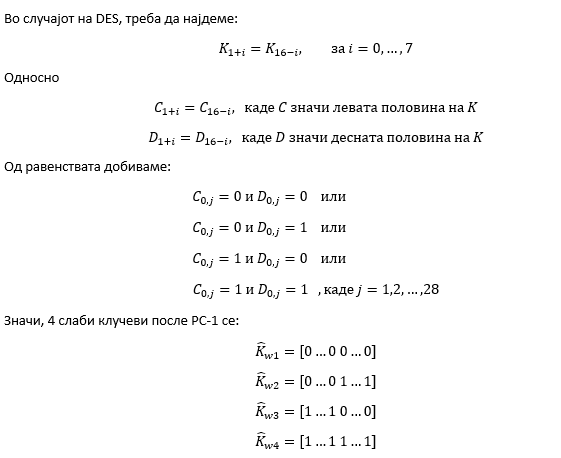

### Тие 4 слаби клучеви пред PC-1 се:  

- Kw1 = 00000000 00000000 00000000 00000000 00000000 00000000 00000000 00000000  
- Kw2 = 00011110 00011110 00011110 00011110 00001111 00001111 00001111 00001111  
- Kw3 = 11100001 11100001 11100001 11100001 11110000 11110000 11110000 11110000  
- Kw4 = 11111111 11111111 11111111 11111111 11111111 11111111 11111111 11111111  

# 2.2.1. СЛАБ КЛУЧ 1
### Kw1 = 0000000000000000000000000000000000000000000000000000000000000000

In [555]:
Kw1 = '0000000000000000000000000000000000000000000000000000000000000000'
Kw1_keys = key_scheduler(_bin_to_hex(Kw1))
print('Round Keys for weak key', Kw1, 'are:')
for i in range(len(Kw1_keys)):
    print('Round ', '%2s' %(i + 1), ':', Kw1_keys[i])

Round Keys for weak key 0000000000000000000000000000000000000000000000000000000000000000 are:
Round   1 : 000000000000000000000000000000000000000000000000
Round   2 : 000000000000000000000000000000000000000000000000
Round   3 : 000000000000000000000000000000000000000000000000
Round   4 : 000000000000000000000000000000000000000000000000
Round   5 : 000000000000000000000000000000000000000000000000
Round   6 : 000000000000000000000000000000000000000000000000
Round   7 : 000000000000000000000000000000000000000000000000
Round   8 : 000000000000000000000000000000000000000000000000
Round   9 : 000000000000000000000000000000000000000000000000
Round  10 : 000000000000000000000000000000000000000000000000
Round  11 : 000000000000000000000000000000000000000000000000
Round  12 : 000000000000000000000000000000000000000000000000
Round  13 : 000000000000000000000000000000000000000000000000
Round  14 : 000000000000000000000000000000000000000000000000
Round  15 : 0000000000000000000000000000000000000000

In [568]:
message = 'Fisnik11'
enkriptirana = encrypt(_bin_to_hex(_ascii_to_bin(message)), Kw1_keys)[2:].upper()
print('Enkriptirana poraka na', message, 'e', enkriptirana)

enkriptirana_enkriptiranata = _bin_to_ascii(_hex_to_bin(encrypt(enkriptirana, Kw1_keys)[2:]))
print('Enkriptirana poraka na', enkriptirana, 'e', enkriptirana_enkriptiranata)

Enkriptirana poraka na Fisnik11 e FB08CEC992240CC1
Enkriptirana poraka na FB08CEC992240CC1 e Fisnik11


## Заклучок: 
- Се изгенерираат исти подклучеви за секоја рунда
- Ако една порака ја енкриптираме 2 пати, ќе го добиеме оригиналната порака!

  
# 2.2.2. СЛАБ КЛУЧ 2
### Kw2 = 00011110 00011110 00011110 00011110 00001111 00001111 00001111 00001111

In [572]:
Kw2 = '0001111000011110000111100001111000001111000011110000111100001111'

Kw2_keys = key_scheduler(_bin_to_hex(Kw2))
print('Round Keys for weak key', Kw2, 'are:')
for i in range(len(Kw2_keys)):
    print('Round ', '%2s' %(i + 1), ':', Kw2_keys[i])
    
message = 'SLABKLUC'
enkriptirana = encrypt(_bin_to_hex(_ascii_to_bin(message)), Kw2_keys)[2:].upper()
print('Enkriptirana poraka na', message, 'e', enkriptirana)

enkriptirana_enkriptiranata = _bin_to_ascii(_hex_to_bin(encrypt(enkriptirana, Kw2_keys)[2:]))
print('Enkriptirana poraka na', enkriptirana, 'e', enkriptirana_enkriptiranata)

Round Keys for weak key 0001111000011110000111100001111000001111000011110000111100001111 are:
Round   1 : 000000000000000000000000111111111111111111111111
Round   2 : 000000000000000000000000111111111111111111111111
Round   3 : 000000000000000000000000111111111111111111111111
Round   4 : 000000000000000000000000111111111111111111111111
Round   5 : 000000000000000000000000111111111111111111111111
Round   6 : 000000000000000000000000111111111111111111111111
Round   7 : 000000000000000000000000111111111111111111111111
Round   8 : 000000000000000000000000111111111111111111111111
Round   9 : 000000000000000000000000111111111111111111111111
Round  10 : 000000000000000000000000111111111111111111111111
Round  11 : 000000000000000000000000111111111111111111111111
Round  12 : 000000000000000000000000111111111111111111111111
Round  13 : 000000000000000000000000111111111111111111111111
Round  14 : 000000000000000000000000111111111111111111111111
Round  15 : 0000000000000000000000001111111111111111


# 2.2.3. СЛАБ КЛУЧ 3
### Kw3 = 11100001 11100001 11100001 11100001 11110000 11110000 11110000 11110000  

In [575]:
Kw3 = '1110000111100001111000011110000111110000111100001111000011110000'

Kw3_keys = key_scheduler(_bin_to_hex(Kw3))
print('Round Keys for weak key', Kw3, 'are:')
for i in range(len(Kw3_keys)):
    print('Round ', '%2s' %(i + 1), ':', Kw3_keys[i])
    
message = 'KRIPTO00'
enkriptirana = encrypt(_bin_to_hex(_ascii_to_bin(message)), Kw3_keys)[2:].upper()
print('Enkriptirana poraka na', message, 'e', enkriptirana)

enkriptirana_enkriptiranata = _bin_to_ascii(_hex_to_bin(encrypt(enkriptirana, Kw3_keys)[2:]))
print('Enkriptirana poraka na', enkriptirana, 'e', enkriptirana_enkriptiranata)

Round Keys for weak key 1110000111100001111000011110000111110000111100001111000011110000 are:
Round   1 : 111111111111111111111111000000000000000000000000
Round   2 : 111111111111111111111111000000000000000000000000
Round   3 : 111111111111111111111111000000000000000000000000
Round   4 : 111111111111111111111111000000000000000000000000
Round   5 : 111111111111111111111111000000000000000000000000
Round   6 : 111111111111111111111111000000000000000000000000
Round   7 : 111111111111111111111111000000000000000000000000
Round   8 : 111111111111111111111111000000000000000000000000
Round   9 : 111111111111111111111111000000000000000000000000
Round  10 : 111111111111111111111111000000000000000000000000
Round  11 : 111111111111111111111111000000000000000000000000
Round  12 : 111111111111111111111111000000000000000000000000
Round  13 : 111111111111111111111111000000000000000000000000
Round  14 : 111111111111111111111111000000000000000000000000
Round  15 : 1111111111111111111111110000000000000000


# 2.2.4. СЛАБ КЛУЧ 4
### Kw4 = 11111111 11111111 11111111 11111111 11111111 11111111 11111111 11111111 

In [576]:
Kw4 = '1111111111111111111111111111111111111111111111111111111111111111'

Kw4_keys = key_scheduler(_bin_to_hex(Kw4))
print('Round Keys for weak key', Kw4, 'are:')
for i in range(len(Kw4_keys)):
    print('Round ', '%2s' %(i + 1), ':', Kw4_keys[i])
    
message = 'F.Limani'
enkriptirana = encrypt(_bin_to_hex(_ascii_to_bin(message)), Kw4_keys)[2:].upper()
print('Enkriptirana poraka na', message, 'e', enkriptirana)

enkriptirana_enkriptiranata = _bin_to_ascii(_hex_to_bin(encrypt(enkriptirana, Kw4_keys)[2:]))
print('Enkriptirana poraka na', enkriptirana, 'e', enkriptirana_enkriptiranata)

Round Keys for weak key 1111111111111111111111111111111111111111111111111111111111111111 are:
Round   1 : 111111111111111111111111111111111111111111111111
Round   2 : 111111111111111111111111111111111111111111111111
Round   3 : 111111111111111111111111111111111111111111111111
Round   4 : 111111111111111111111111111111111111111111111111
Round   5 : 111111111111111111111111111111111111111111111111
Round   6 : 111111111111111111111111111111111111111111111111
Round   7 : 111111111111111111111111111111111111111111111111
Round   8 : 111111111111111111111111111111111111111111111111
Round   9 : 111111111111111111111111111111111111111111111111
Round  10 : 111111111111111111111111111111111111111111111111
Round  11 : 111111111111111111111111111111111111111111111111
Round  12 : 111111111111111111111111111111111111111111111111
Round  13 : 111111111111111111111111111111111111111111111111
Round  14 : 111111111111111111111111111111111111111111111111
Round  15 : 1111111111111111111111111111111111111111

## Заклучок за 2.2.2, 2.2.3, 2.2.4

##### Важи истиот заклучок како и за 2.2.1. т.е.:
- Се изгенерираат исти подклучеви за секоја рунда
- Ако една порака ја енкриптираме 2 пати, ќе го добиеме оригиналната порака!

### References:

- https://csrc.nist.gov/csrc/media/publications/fips/46/3/archive/1999-10-25/documents/fips46-3.pdf
- http://page.math.tu-berlin.de/~kant/teaching/hess/krypto-ws2006/des.htm
- https://github.com/JoshGutman/Data-Encryption-Standard
- https://academic.csuohio.edu/yuc/security/Chapter_06_Data_Encription_Standard.pdf